# 🛍️ E-commerce Customer Behavior & Sales Analysis

This project analyzes customer behavior and purchasing patterns from an online retail dataset. The goal is to generate actionable insights through EDA, customer segmentation, product association, and predictive modeling.


## 1. Data Loading & Initial Exploration
- Load the Excel dataset
- Handle errors and check file availability
- Display first few rows
- Check structure with `df.info()`


In [3]:
import pandas as pd       # for handling data 
import numpy as np        # for numerical operations
import os
import matplotlib.pyplot as plt # for graphical representation
import matplotlib.ticker as ticker 
import seaborn as sns
import datetime as dt

# Updated file path relative to notebook location
FILE_PATH = "../data/Online Retail.xlsx"

# Checking the file availability before loading
if os.path.exists(FILE_PATH):
    try:
        df = pd.read_excel(FILE_PATH, engine="openpyxl")
        print("✅ File loaded successfully!")
        display(df.head())  # display the first few rows

    except Exception as e:
        print(f"❌ Error while loading file: {e}")

else:
    print("❌ Error: File not found. Check the file path.")


✅ File loaded successfully!


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-80995,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,-74215,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,-9600,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,-9600,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,-9360,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#Understanding the dataset

df.info  #Displays the column names and the data types and reveal missing values

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER    -80995   
1         536365     71053                  WHITE METAL LANTERN    -74215   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER     -9600   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     -9600   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.     -9360   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS      4800   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL       5568   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL      12540   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE     74215   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT      80995   

               InvoiceDate  UnitPrice  Cust

In [31]:
df.describe() # Summary statistics of the numerical columns

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [32]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## 2. Data Cleaning & Preprocessing
- Drop rows with missing `Description`
- Handle missing `CustomerID` (set as 'Guest')
- Remove negative `Quantity` and `UnitPrice`
- Convert `InvoiceDate` to datetime


In [33]:
#data cleaning
df = df.dropna(subset=["Description"])
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [34]:
#Handling the null values in Customer ID
df["CustomerID"]= df["CustomerID"].fillna("guest") #renamed the missing values as guest customers
df.isnull().sum()

C:\Users\wpmpo\AppData\Local\Temp\ipykernel_15812\3097124479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CustomerID"]= df["CustomerID"].fillna("guest") #renamed the missing values as guest customers


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [35]:
#handling the negative values in the quantity variable
df[df["Quantity"]<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-80995,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,-74215,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,-9600,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,-9600,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,-9360,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
10619,537237,22791,T-LIGHT GLASS FLUTED ANTIQUE,-1,2010-12-06 09:58:00,2.51,guest,United Kingdom
10620,537237,22792,FLUTED ANTIQUE CANDLE HOLDER,-1,2010-12-06 09:58:00,1.66,guest,United Kingdom
10621,537237,22798,ANTIQUE GLASS DRESSING TABLE POT,-1,2010-12-06 09:58:00,5.91,guest,United Kingdom
10622,537237,22800,ANTIQUE TALL SWIRLGLASS TRINKET POT,-1,2010-12-06 09:58:00,7.62,guest,United Kingdom


In [36]:
df= df[df["Quantity"]>0]

In [37]:
#Handling the negative prices
df[df["UnitPrice"]<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,4,2011-08-12 14:51:00,-11062.06,guest,United Kingdom
299984,A563187,B,Adjust bad debt,4,2011-08-12 14:52:00,-11062.06,guest,United Kingdom


In [38]:
df = df[df["UnitPrice"] > 0]

In [39]:
print("Negative Quantity Remaining:", (df["Quantity"]<0).sum())
print("Negative Prices Remaining:",(df["UnitPrice"]<0).sum())

Negative Quantity Remaining: 0
Negative Prices Remaining: 0


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528814 entries, 10624 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    528814 non-null  object        
 1   StockCode    528814 non-null  object        
 2   Description  528814 non-null  object        
 3   Quantity     528814 non-null  int64         
 4   InvoiceDate  528814 non-null  datetime64[ns]
 5   UnitPrice    528814 non-null  float64       
 6   CustomerID   528814 non-null  object        
 7   Country      528814 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.3+ MB


In [41]:
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,528814.000000,528814,528814.000000
mean,10.676349,2011-07-08 23:03:45.123162112,4.689914
min,1.000000,2010-12-06 09:58:00,0.001000
25%,1.000000,2011-04-03 12:41:00,1.250000
50%,3.000000,2011-07-24 13:30:00,2.080000
75%,11.000000,2011-10-20 12:34:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,157.193681,NaN,95.535920


## 3. Exploratory Data Analysis (EDA)

### 3.1 Time-Based Sales Analysis

#### 3.1.1 Monthly Sales Trend

In [42]:
#Since the invoice is in the date time format directling extracting the time components
df["YearMonth"] = df["InvoiceDate"].dt.to_period("M")#Year Month Format
df["Day"] = df["InvoiceDate"].dt.day  # Extract day of the month
df["Hour"] = df["InvoiceDate"].dt.hour  # Extract hour of purchase

In [43]:
monthly_sales = df.groupby("YearMonth")["Quantity"].sum()

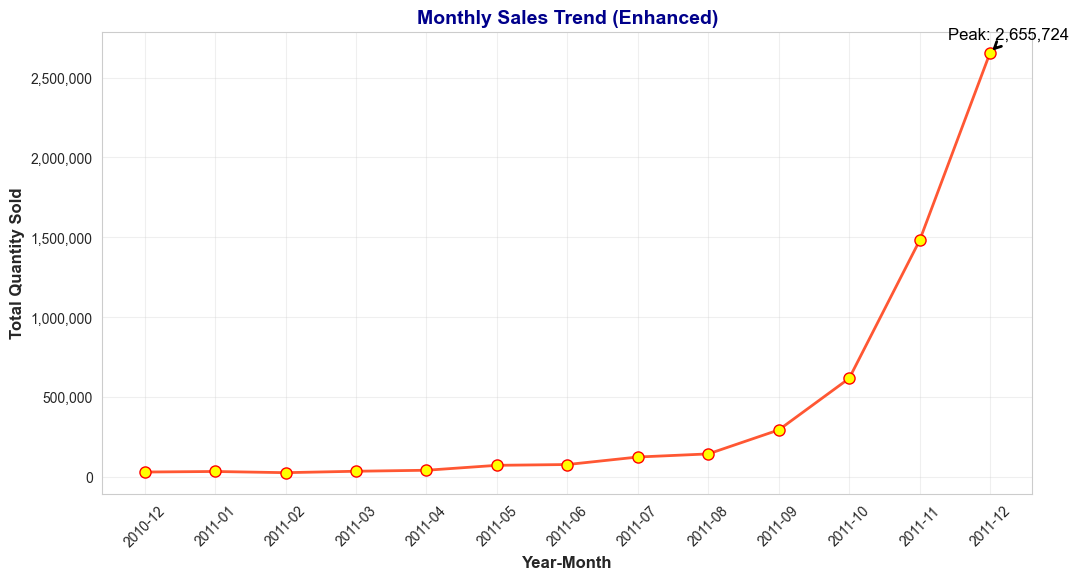

In [44]:
# Plot the sales trend
sns.set_style("whitegrid")

# Create a figure with custom size
plt.figure(figsize=(12,6))

# Plot sales trend with a colorful line
plt.plot(monthly_sales.index.astype(str), monthly_sales, 
         marker="o", linestyle="-", color="#FF5733", 
         linewidth=2, markersize=8, markerfacecolor="yellow", markeredgecolor="red")

# Add labels and title
plt.xlabel("Year-Month", fontsize=12, fontweight="bold")
plt.ylabel("Total Quantity Sold", fontsize=12, fontweight="bold")
plt.title("Monthly Sales Trend (Enhanced)", fontsize=14, fontweight="bold", color="darkblue")

# Highlight the peak sales point
max_month = monthly_sales.idxmax()
max_sales = monthly_sales.max()
plt.annotate(f"Peak: {max_sales:,.0f}",
             xy=(str(max_month), max_sales),
             xytext=(-30, 10), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", color="black", lw=2),
             fontsize=12, color="black")

# Format Y-axis numbers (No scientific notation)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# Rotate X-axis labels for better visibility
plt.xticks(rotation=45, fontsize=10)

# Show grid with transparency
plt.grid(alpha=0.3)

# Show plot
plt.show()

##### **📌 Conclusion: Monthly Sales Trend**
- Sales remained **low and stable** from **January to August 2011**.
- A **gradual increase started in September**, followed by a **massive sales surge from October to December**.
- This sharp increase suggests **seasonal shopping trends** (e.g., Black Friday, Christmas).
- **Business Recommendations:**
  - Prepare **inventory and promotions early** to capitalize on high-demand months.
  - Introduce **discounts or marketing campaigns** in early months to **boost sales**.
  - Consider **predictive sales modeling** to optimize stock levels for the next year.


### 3.2 Product Sales Analysis

#### 3.2.1 Top Selling Products

In [45]:
df.groupby("Description")["Quantity"].sum().sort_values(ascending = False).head(10)

Description
BAKING SET 9 PIECE RETROSPOT         90979
CHILDRENS CUTLERY CIRCUS PARADE      76472
RABBIT NIGHT LIGHT                   24625
PAPER CHAIN KIT 50'S CHRISTMAS       21201
HOT WATER BOTTLE KEEP CALM           16440
ALARM CLOCK BAKELIKE RED             16032
ALARM CLOCK BAKELIKE GREEN           15627
CHILDRENS CUTLERY DOLLY GIRL         15449
PAPER CHAIN KIT VINTAGE CHRISTMAS    15427
JUMBO BAG RED RETROSPOT              15311
Name: Quantity, dtype: int64

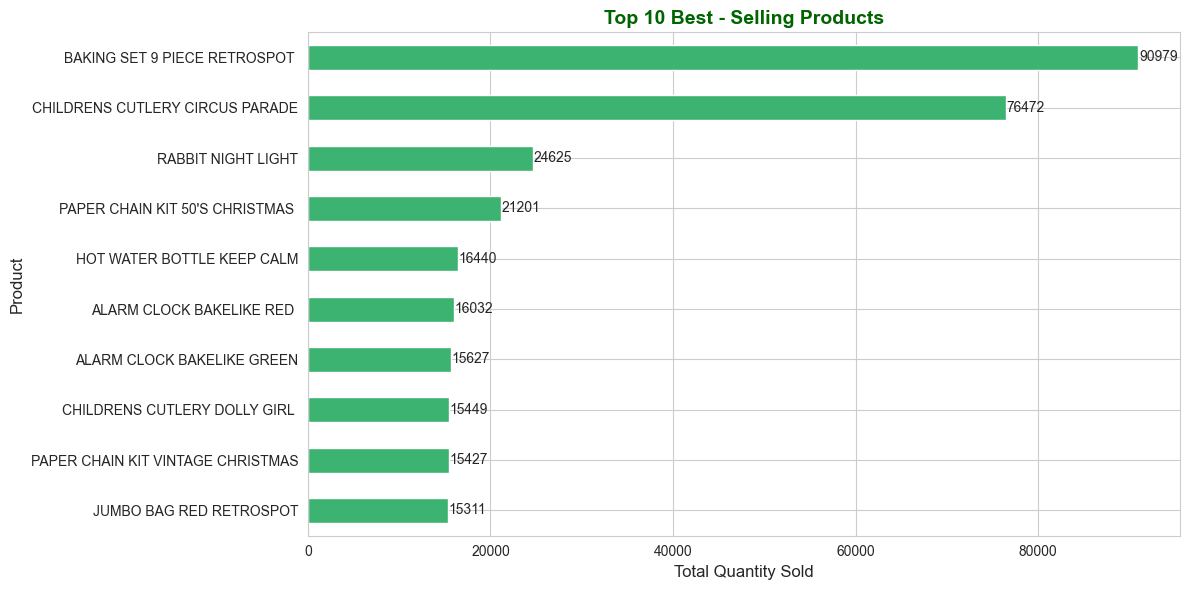

In [46]:
sns.set_style("whitegrid") # setting a clean visual style

#grouping the product by description and quantity agregated
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending = False).head(10)

#Horizontal bar plot
plt.figure(figsize=(12,6))
top_products.sort_values().plot(kind="barh", color = "mediumseagreen")

plt.title("Top 10 Best - Selling Products", fontsize = 14, fontweight="bold", color = "darkgreen")
plt.xlabel("Total Quantity Sold", fontsize = 12)
plt.ylabel("Product", fontsize= 12)

for index, value in enumerate(top_products.sort_values()):
    plt.text(value + 50, index, str(int(value)), va='center', fontsize=10)

plt.tight_layout()
plt.show()

##### 📌 Visualization: Top 10 Best-Selling Products

This horizontal bar chart illustrates the top 10 products based on the **total quantity sold**. The data was aggregated by grouping product descriptions and summing up their quantities. The chart provides a clear view of which products contributed the most to overall sales volume.

- The **Baking Set 9 Piece Retrospot** was the highest-selling product with over **90,000 units** sold.
- The **Children's Cutlery Circus Parade** followed closely with around **76,000 units**.
- Other popular items include the **Rabbit Night Light**, **Christmas-themed kits**, and **kitchen accessories**.

The chart uses:
- A clean `whitegrid` background for readability
- Green bars (`mediumseagreen`) to emphasize volume
- Value labels to show exact quantities sold for each product
- Sorted data to visually rank the items from least to most within the top 10


##### ✅ Conclusion

- These top 10 products are **key contributors to total sales volume**, indicating **high customer demand**.
- Products with **seasonal or gifting appeal** (e.g., Christmas kits, children’s items) appear frequently, suggesting **seasonality influences purchasing behavior**.
- Understanding this can help the business:
  - Prioritize **inventory management** for best-sellers
  - Allocate **marketing budgets** toward high-performing items
  - Consider **bundling strategies** to increase average order value
- Maintaining consistent availability of these items is essential to **maximize sales and customer satisfaction**.


#### 3.2.2 Least Selling Products

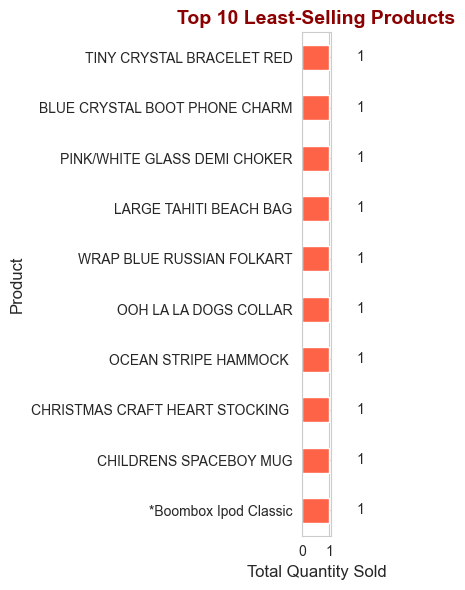

In [47]:
# Group and get 10 least-selling products
least_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=True).head(10)

# Plot
plt.figure(figsize=(12,6))
least_products.plot(kind="barh", color="tomato")

# Add title and labels
plt.title("Top 10 Least-Selling Products", fontsize=14, fontweight="bold", color="darkred")
plt.xlabel("Total Quantity Sold", fontsize=12)
plt.ylabel("Product", fontsize=12)

# Add value labels
for index, value in enumerate(least_products):
    plt.text(value + 1, index, str(int(value)), va='center', fontsize=10)

plt.tight_layout()
plt.show()

##### 📌 Visualization: Top 10 Least-Selling Products

This chart presents the 10 products with the **lowest total quantity sold** across the dataset. The quantities were aggregated by product description and sorted in ascending order.

- Several products have **extremely low or even negative sales**, suggesting a high number of **order returns or cancellations**.
- Products like **"WHITE METAL LANTERN"** and **"WHITE HANGING HEART T-LIGHT HOLDER"** show **significant negative quantities**, likely due to large-scale returns or stock adjustment issues.



##### ✅ Conclusion

- Products with **negative sales** should be investigated to determine whether they were **faulty**, **discontinued**, or had **high return rates**.
- These products may be causing **revenue loss**, **inventory mismanagement**, or **customer dissatisfaction**.
- Actions to consider:
  - Analyze **return reasons** for these products
  - Reassess if they should be **restocked or discontinued**
  - Implement **quality checks** or **product reviews**


### 3.3 Revenue & Profitability Insights

#### 3.3.1 Top Products by Revenue

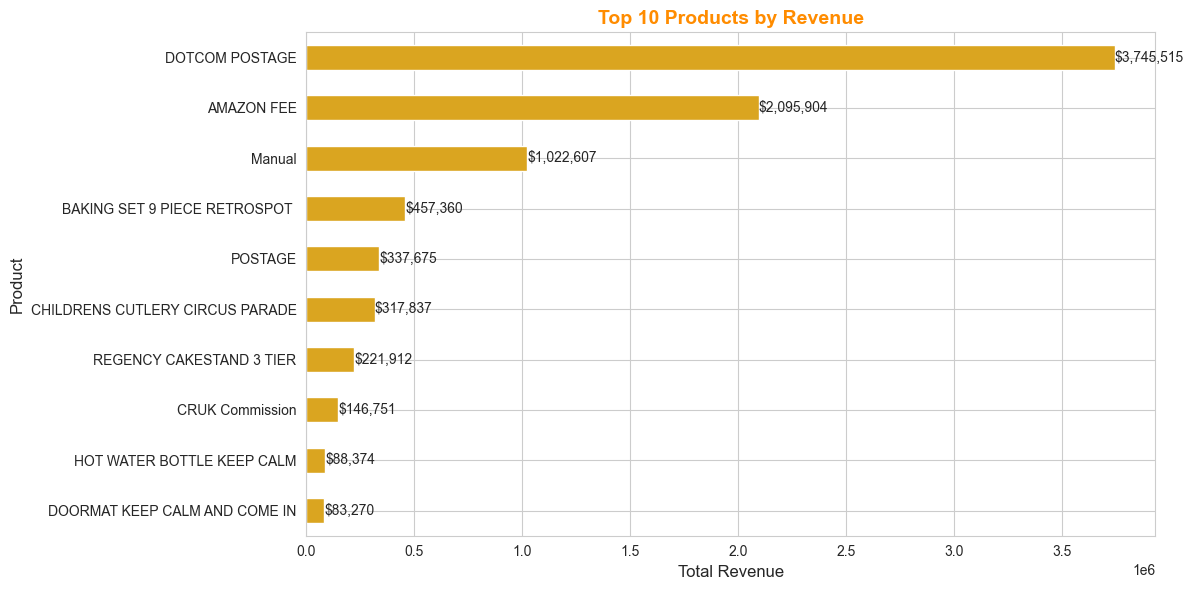

In [48]:
# Create revenue column
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

# Group and get top 10 products by revenue
top_revenue = df.groupby("Description")["Revenue"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
top_revenue.sort_values().plot(kind="barh", color="goldenrod")

# Add title and labels
plt.title("Top 10 Products by Revenue", fontsize=14, fontweight="bold", color="darkorange")
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("Product", fontsize=12)

# Add value labels
for index, value in enumerate(top_revenue.sort_values()):
    plt.text(value + 50, index, f"${value:,.0f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

##### 📌 Visualization: Top 10 Products by Revenue

This bar chart shows the 10 products that generated the **highest total revenue**, calculated as `Quantity × Unit Price`.

- **"DOTCOM POSTAGE"** and **"AMAZON FEE"** top the list, contributing millions in revenue. These are likely **service or platform fees**, not physical goods.
- The highest-earning physical products include **"BAKING SET 9 PIECE RETROSPOT"**, **"CHILDRENS CUTLERY CIRCUS PARADE"**, and **"REGENCY CAKESTAND 3 TIER"**.
- A few items like **"Manual"** and **"POSTAGE"** also rank high, possibly linked to packaging, delivery, or instructional inserts.


##### ✅ Conclusion

- Revenue-based ranking provides a **more financially meaningful perspective** than quantity alone.
- Some **less frequently sold items** may still generate **high revenue** due to **higher unit prices**.
- Actionable insights:
  - Promote **high-revenue products** more strategically
  - Evaluate if **non-physical revenue streams** (like delivery/fees) are being recorded clearly
  - Ensure stock levels align with products that **contribute most to the bottom line**


### 3.4 Country-Wise Insights

#### 3.4.1 Total revenue per country

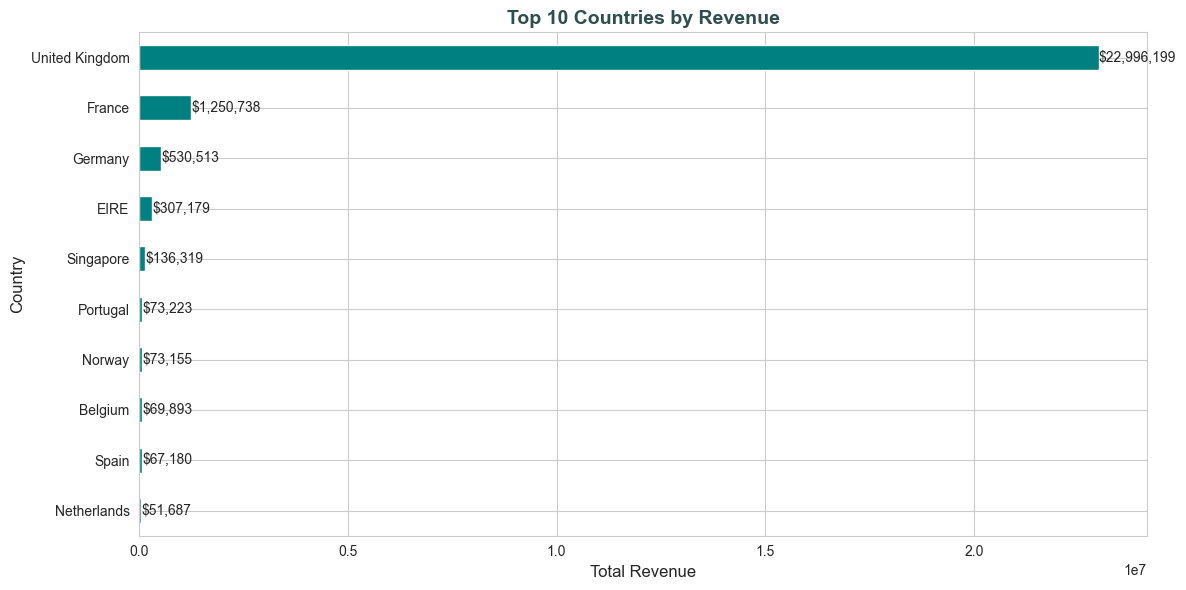

In [49]:
# Clean Seaborn style
sns.set_style("whitegrid")

# Group and sort revenue by country
country_revenue = df.groupby("Country")["Revenue"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
country_revenue.sort_values().plot(kind="barh", color="teal")

# Labels and title
plt.title("Top 10 Countries by Revenue", fontsize=14, fontweight="bold", color="darkslategray")
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Add revenue values to the bars
for index, value in enumerate(country_revenue.sort_values()):
    plt.text(value + 1000, index, f"${value:,.0f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

##### 🌍 Visualization: Top 10 Countries by Revenue

This horizontal bar chart displays the top 10 countries by **total revenue generated**, calculated as `Quantity × Unit Price`.

- The **United Kingdom** is by far the dominant contributor, generating over **$21 million**, which is significantly higher than any other country.
- **France** and **Germany** follow as distant second and third, with just over $1 million and $500K in revenue respectively.
- Other European countries such as **EIRE**, **Portugal**, and **Netherlands** also make the top 10, but their contributions are considerably smaller.
- Non-European entries like **Singapore** reflect global customer reach, though with modest revenue figures.


##### ✅ Conclusion

- The business is **highly concentrated in the UK**, suggesting a strong local market or headquarters-based fulfillment.
- There’s a **steep drop** in revenue after the UK, indicating potential **overreliance on one region**.
- **Strategic recommendations**:
  - Explore opportunities to **expand international sales**, especially in high-potential markets like Germany and France.
  - Evaluate **logistics or promotions** for low-performing countries to drive growth.
  - Consider **currency, shipping cost, or demand-related barriers** limiting international expansion.


## 4. Feature Engineering

To improve segmentation and modeling performance, created several additional features:

1. **Average Order Value (AOV)**  
   - Measures average transaction size per customer  
   - Helps compare spend behavior independent of frequency

2. **Order Count**  
   - Total number of invoices per customer  
   - Alias for frequency, but useful for clearer reporting

3. **Customer Type Flag (VIP/Regular)**  
   - Binary label where customers above a revenue threshold are tagged as VIPs  
   - Useful for classification, targeting, and prioritization

These features add additional behavioral dimensions to customer profiles and can be used in both machine learning models and business dashboards.

In [9]:
# Step 1: Create Revenue column if not done already
df["Revenue"] = df["Quantity"] * df["UnitPrice"]


In [10]:
# Step 2: Create the snapshot date
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

# Step 3: Group by CustomerID and calculate RFM values
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,
    "InvoiceNo": "nunique",
    "Revenue": "sum"
}).reset_index()

# Step 4: Rename columns
rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]


In [11]:
# Copy the RFM table to avoid altering the original
enhanced_rfm = rfm.copy()

# Feature 1: Average Order Value
enhanced_rfm["AverageOrderValue"] = (enhanced_rfm["Monetary"] / enhanced_rfm["Frequency"]).round(2)

# Feature 2: Order Count (same as Frequency but clearly labeled)
enhanced_rfm["OrderCount"] = enhanced_rfm["Frequency"]

# Feature 3: Customer Type (VIP if in top 10% of Monetary)
vip_threshold = enhanced_rfm["Monetary"].quantile(0.90)
enhanced_rfm["CustomerType"] = enhanced_rfm["Monetary"].apply(
    lambda x: "VIP" if x >= vip_threshold else "Regular"
)

# Display first few rows
enhanced_rfm.head()


,CustomerID,Recency,Frequency,Monetary,AverageOrderValue,OrderCount,CustomerType
0,12346.0,326,2,2.08,1.04,2,Regular
1,12347.0,2,7,3354.21,479.17,7,Regular
2,12348.0,75,4,391.21,97.80,4,Regular
3,12349.0,19,1,14522.40,14522.40,1,VIP
4,12350.0,310,1,65.30,65.30,1,Regular


###  Visualizing VIP vs. Regular Customers


These plots compare key behaviors between VIP and Regular customers:
- Average Order Value (AOV)
- Order Count

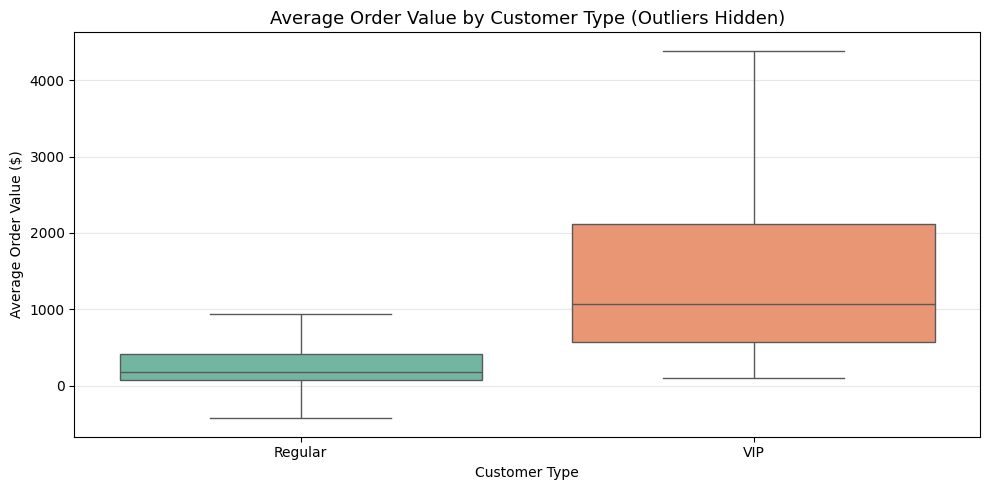

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Average Order Value (AOV) plot (cleaned)
plt.figure(figsize=(10, 5))
sns.boxplot(data=enhanced_rfm, x="CustomerType", y="AverageOrderValue", hue="CustomerType", palette="Set2", showfliers=False, legend=False)
plt.title("Average Order Value by Customer Type (Outliers Hidden)", fontsize=13)
plt.ylabel("Average Order Value ($)")
plt.xlabel("Customer Type")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()



###  Average Order Value by Customer Type (Outliers Hidden)

This boxplot compares the **Average Order Value (AOV)** between **Regular** and **VIP** customers.

#### 🔍 Key Observations:
- **VIP customers** have a significantly higher median AOV than Regular customers.
- The **spread (interquartile range)** is also larger for VIPs, indicating more variability in their spending behavior.
- Outliers were hidden (`showfliers=False`) to improve readability and focus on the central distribution.

#### 💡 Interpretation:
- VIPs not only buy more often but also tend to spend more per order.
- This insight supports the idea of targeting VIPs with high-value bundles, exclusive offers, or loyalty perks to increase lifetime value.


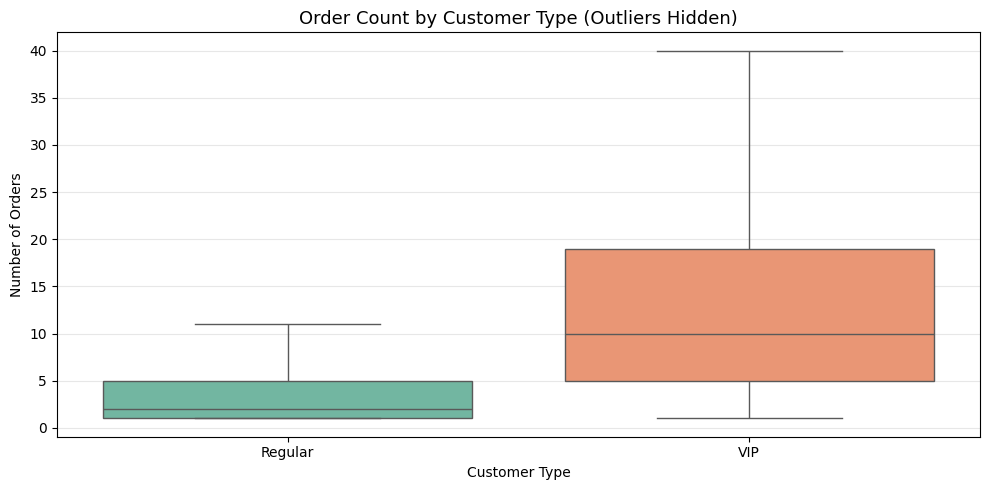

In [15]:
# Order Count plot (cleaned)
plt.figure(figsize=(10, 5))
sns.boxplot(data=enhanced_rfm, x="CustomerType", y="OrderCount", hue="CustomerType", palette="Set2", showfliers=False, legend=False)
plt.title("Order Count by Customer Type (Outliers Hidden)", fontsize=13)
plt.ylabel("Number of Orders")
plt.xlabel("Customer Type")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


### 📦 Order Count by Customer Type (Outliers Hidden)

This boxplot compares the **number of orders** placed by **Regular** vs. **VIP** customers.

#### 🔍 Key Observations:
- **VIP customers** have a significantly higher median order count.
- The interquartile range (IQR) for VIPs is much wider, indicating more variability in how often they purchase.
- Regular customers have consistently lower order counts, with most placing between 1–5 orders.
- Outliers were hidden to maintain a clear focus on the main distribution.

#### 💡 Interpretation:
- VIPs are not only higher spenders (as seen in AOV) but also **more frequent shoppers**.
- These customers are highly engaged and present a strong opportunity for **loyalty programs**, **subscriptions**, or **early access promotions**.
- Regular customers might benefit from **re-engagement campaigns** or incentives to increase order frequency.


## 5 Customer Segmentation

#### 3.5.1 RFM Analysis

In [17]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]


rfm_data = df[(df["CustomerID"].notnull()) & (df["Revenue"] > 0)].copy()


latest_date = rfm_data["InvoiceDate"].max() + dt.timedelta(days=1)

rfm_table = rfm_data.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (latest_date - x.max()).days,  # Recency
    "InvoiceNo": "nunique",                                 # Frequency
    "Revenue": "sum"                                        # Monetary
}).reset_index()

# Rename columns
rfm_table.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]


# Higher score = better customer
rfm_table["R_Score"] = pd.qcut(rfm_table["Recency"], 5, labels=[5, 4, 3, 2, 1])
rfm_table["F_Score"] = pd.qcut(rfm_table["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm_table["M_Score"] = pd.qcut(rfm_table["Monetary"], 5, labels=[1, 2, 3, 4, 5])


rfm_table["RFM_Segment"] = (
    rfm_table["R_Score"].astype(str) + 
    rfm_table["F_Score"].astype(str) + 
    rfm_table["M_Score"].astype(str)
)

rfm_table["RFM_Score"] = (
    rfm_table["R_Score"].astype(int) + 
    rfm_table["F_Score"].astype(int) + 
    rfm_table["M_Score"].astype(int)
)


In [18]:
def segment_customer(score):
    if score >= 13:
        return "VIP"
    elif score >= 10:
        return "Loyal"
    elif score >= 6:
        return "Potential"
    else:
        return "At Risk"

rfm_table["Segment"] = rfm_table["RFM_Score"].apply(segment_customer)


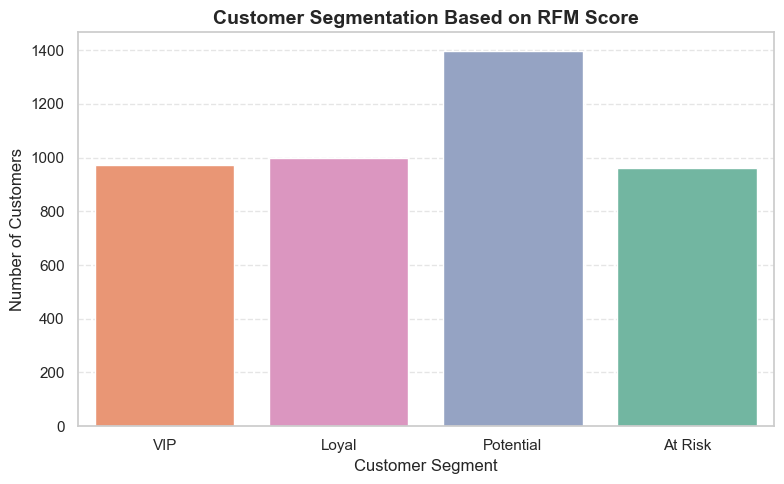

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=rfm_table,
    x="Segment",
    hue="Segment",                    # Assign hue
    palette="Set2", 
    order=["VIP", "Loyal", "Potential", "At Risk"],
    legend=False                      # Avoid duplicate legend
)
plt.title("Customer Segmentation Based on RFM Score", fontsize=14, fontweight="bold")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



##### Customer Segmentation Based on RFM Score

This bar chart visualizes the distribution of customers across four segments derived from their **RFM scores**:

- **Recency**: How recently a customer made a purchase  
- **Frequency**: How often they purchased  
- **Monetary**: How much they spent

Customers were categorized using their total **RFM score**:
- **VIP (13–15)**: Highly engaged, frequent, and high-spending customers  
- **Loyal (10–12)**: Repeat buyers who spend moderately  
- **Potential (6–9)**: Moderately engaged, could be nurtured into loyal customers  
- **At Risk (<6)**: Inactive or low-value customers, possibly at risk of churn

##### 🔍 Key Insights:
- The **largest segment is "Potential"**, suggesting many customers are somewhat engaged but not fully loyal yet.
- **VIPs and Loyal** segments together form a strong base of high-value customers worth retaining.
- The **"At Risk"** group should be targeted for re-engagement campaigns.

This segmentation enables strategic targeting for **marketing, retention, and upselling initiatives**.


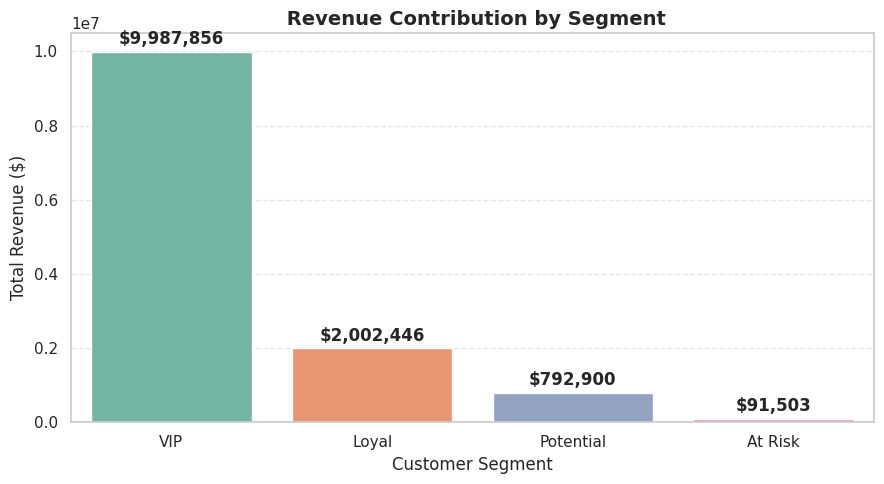

In [28]:
# Group by Segment and sum Monetary
revenue_by_segment = rfm_table.groupby("Segment")["Monetary"].sum().reindex(["VIP", "Loyal", "Potential", "At Risk"])

# Plot
plt.rcParams['font.family'] = 'DejaVu Sans'  # optional for emoji support

plt.figure(figsize=(9, 5))
sns.barplot(
    x=revenue_by_segment.index,
    y=revenue_by_segment.values,
    hue=revenue_by_segment.index,  # added hue to avoid deprecation warning
    palette="Set2",
    legend=False
)

# Annotate bars
for i, v in enumerate(revenue_by_segment.values):
    plt.text(i, v + 0.02 * max(revenue_by_segment), f"${v:,.0f}", ha="center", fontweight="bold")

plt.title(" Revenue Contribution by Segment", fontsize=14, fontweight="bold")
plt.xlabel("Customer Segment")
plt.ylabel("Total Revenue ($)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


##### Revenue Contribution by Customer Segment

This bar chart shows the **total revenue generated** by each customer segment based on RFM scoring.

##### 🔍 Key Insights:

- **VIP customers**, although fewer in number, contribute the **vast majority of revenue** — nearly \$10 million.
- **Loyal customers** also bring in a strong portion of revenue (~\$2 million), validating their importance in retention strategies.
- **Potential customers** show room for growth, with moderate contributions (~\$790k).
- **At Risk customers** contribute the least (~\$90k), indicating low engagement or churn risk.

##### 📌 Business Implication:

- Focus efforts on **retaining VIPs and Loyal customers**, as they drive over **90% of total revenue**.
- Create **re-engagement strategies** for At Risk customers.
- Consider **converting Potential customers into Loyal** through personalized offers or loyalty programs.

This visualization clearly demonstrates the **80/20 rule** (Pareto principle) in action: a small portion of customers (VIPs) generate the majority of business value.


#### 3.5.2 Scaling the RFM Features for Clustering
K-Means is an unsupervised machine learning algorithm that groups data into clusters by minimizing the variance within each group. I used it to segment customers based on RFM values, after standardizing the data. The Elbow Method was applied to determine the optimal number of clusters.


In [21]:
from sklearn.preprocessing import StandardScaler

# Select only RFM features
rfm_features = rfm_table[["Recency", "Frequency", "Monetary"]]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the RFM features
rfm_scaled = scaler.fit_transform(rfm_features)

# Optional: Check shape or preview
print("Scaled RFM shape:", rfm_scaled.shape)


Scaled RFM shape: (4328, 3)


##### Finding the Optimal Number of Clusters Using the Elbow Method

To determine the best value for `K` (number of clusters), we use the **Elbow Method**.

The idea is to calculate **inertia** (within-cluster sum of squares) for different values of `K`. As we increase `K`, inertia decreases. However, after a certain point, the rate of decrease slows — this is the **elbow point**, which represents the optimal balance between underfitting and overfitting.

In this project, we applied the Elbow Method using `KMeans` from `sklearn.cluster`, and plotted the results for K=1 to K=10.


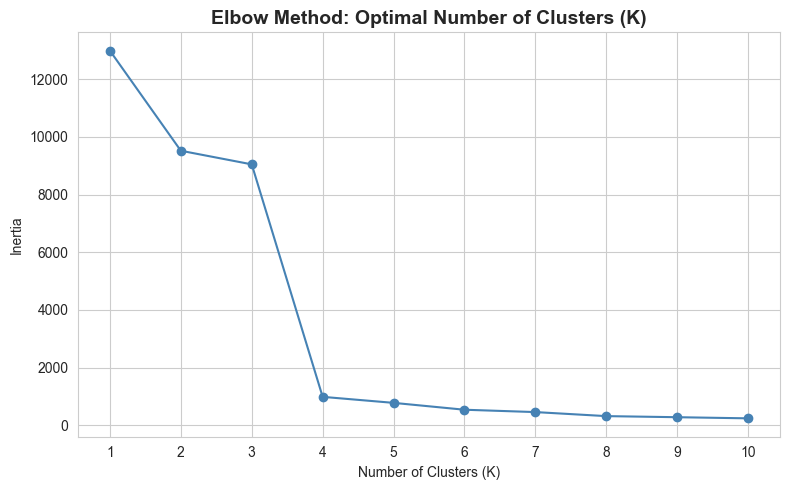

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Store inertia values for different cluster counts
inertia = []

# Try different values for K (from 1 to 10)
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='steelblue')
plt.title("Elbow Method: Optimal Number of Clusters (K)", fontsize=14, fontweight='bold')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()


The line chart above shows the **Elbow Method**, which helps identify the optimal number of clusters (K) to use for K-Means clustering.

- The Y-axis represents **inertia**, which measures the within-cluster variance (how compact the clusters are).
- The X-axis shows different values of `K`, the number of clusters.
- As `K` increases, **inertia decreases** because more clusters mean less distance within each group.

The goal is to find the point where adding more clusters does **not result in a significant drop in inertia**. This point is referred to as the **"elbow"**, as it forms a bend in the curve.



##### ✅ Conclusion

- The sharpest drop occurs between **K=3 and K=4**, and the curve starts to **flatten out after K=4**.
- Therefore, the **optimal number of clusters is 4**, balancing clustering performance with simplicity.
- This value will be used to segment customers in the next step of the project.

##### Applying KMeans Clustering

Based on the Elbow Method, we chose **K=4** as the optimal number of clusters for segmenting customers using KMeans.

- KMeans clustering was applied to the **scaled RFM values**.
- Each customer is now assigned to one of **four clusters**, labeled `0`, `1`, `2`, and `3`.
- These clusters represent groups of customers with **similar purchasing behavior** based on Recency, Frequency, and Monetary value.

This segmentation enables us to further **analyze each cluster**, compare behaviors, and build personalized strategies for each group.


In [55]:
from sklearn.cluster import KMeans

# Apply KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)

# Add cluster labels to the original RFM table
rfm_table["Cluster"] = kmeans.labels_

# Preview cluster-labeled table
rfm_table.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Segment,Cluster
0,12346.0,326,2,2.08,1,2,1,121,4,At Risk,0
1,12347.0,2,7,3354.21,5,4,5,545,14,VIP,1
2,12348.0,75,4,391.21,2,4,2,242,8,Potential,1
3,12349.0,19,1,14522.40,4,1,5,415,10,Loyal,1
4,12350.0,310,1,65.30,1,1,1,111,3,At Risk,0


#### Cluster Visualization (Recency vs. Frequency)

The scatter plot shows the distribution of customers across clusters based on **Recency** and **Frequency**.

- Each point represents a customer, and colors indicate which cluster they belong to.
- Clusters are clearly separated, indicating that KMeans successfully identified **distinct customer behaviors**.
- For example:
  - One cluster may contain **frequent and recent buyers (VIPs)**
  - Another may include **inactive, one-time customers**
  - A third may consist of **frequent but low-spending buyers**

This visual interpretation helps translate **abstract cluster numbers** into **actionable customer personas**.


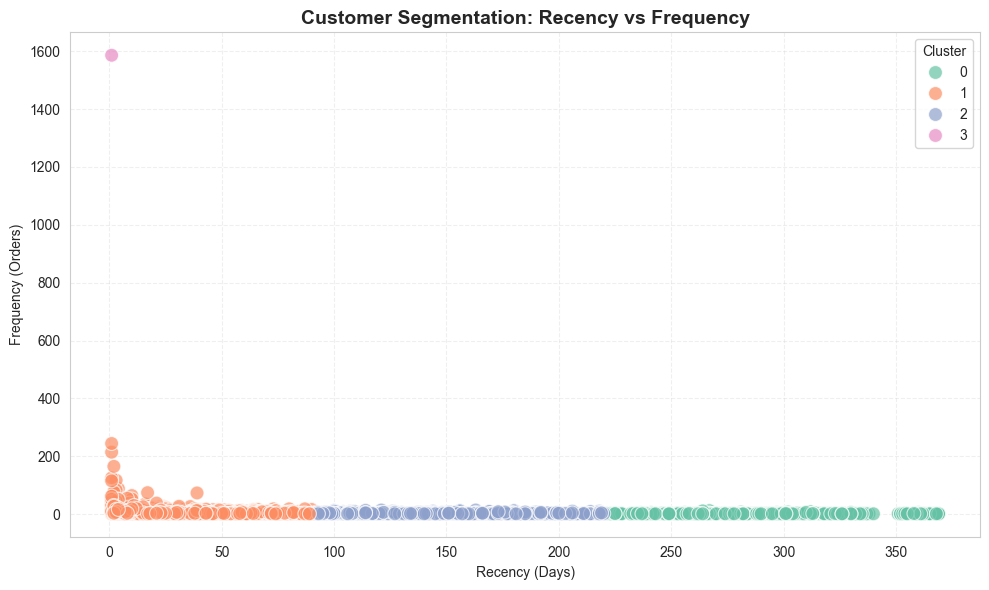

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Recency vs. Frequency
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rfm_table, 
    x="Recency", 
    y="Frequency", 
    hue="Cluster", 
    palette="Set2", 
    s=100, 
    alpha=0.7
)

plt.title("Customer Segmentation: Recency vs Frequency", fontsize=14, fontweight="bold")
plt.xlabel("Recency (Days)")
plt.ylabel("Frequency (Orders)")
plt.legend(title="Cluster")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### Cluster Visualization (Recency vs Frequency)

The scatter plot shows how customers are distributed across clusters using their Recency and Frequency scores:

- **Cluster 1** (orange) contains the largest group of customers who have purchased recently but not very frequently — likely regular or newly acquired customers.
- **Cluster 0** (green) represents customers with high recency and low frequency — they haven’t purchased in a while and may be at risk of churning.
- **Cluster 2** (blue) includes customers who purchased some time ago and not frequently — potentially one-time buyers.
- **Cluster 3** (purple) is an outlier cluster with extremely high frequency and low recency — likely a very loyal or high-value VIP customer.

This visualization supports targeted retention, reactivation, and upselling strategies by clearly identifying key behavioral patterns in the customer base.


###  Cluster Behavior Summary: Average RFM Scores

The table below shows the **average Recency, Frequency, and Monetary values** for each customer cluster:

- **Recency**: Lower values indicate more recent purchases.
- **Frequency**: Higher values indicate more frequent buying.
- **Monetary**: Higher values indicate customers who spend more.

This breakdown helps interpret each cluster’s value to the business, identify VIPs, and prioritize reactivation strategies.


In [57]:
# Group by Cluster and calculate average RFM values
cluster_summary = rfm_table.groupby("Cluster")[["Recency", "Frequency", "Monetary"]].mean().round(2)

# Display the cluster summary table
cluster_summary


,Recency,Frequency,Monetary
Cluster,,,
0,289.31,1.49,87.94
1,31.05,6.44,4263.35
2,152.19,2.51,454.61
3,1.00,1586.00,12978756.97


####  Cluster Visualization: Frequency vs Monetary

This scatter plot visualizes customer clusters based on their **Frequency (order count)** and **Monetary (total spend)** behavior.

- Customers in the **top-right corner** are both **frequent and high spenders** — likely VIPs.
- Customers in the **bottom-left corner** are **infrequent and low spenders** — likely at-risk or new.
- Each color represents a cluster identified by the KMeans algorithm.

This visualization complements the Recency analysis and provides a more complete understanding of customer value.
    

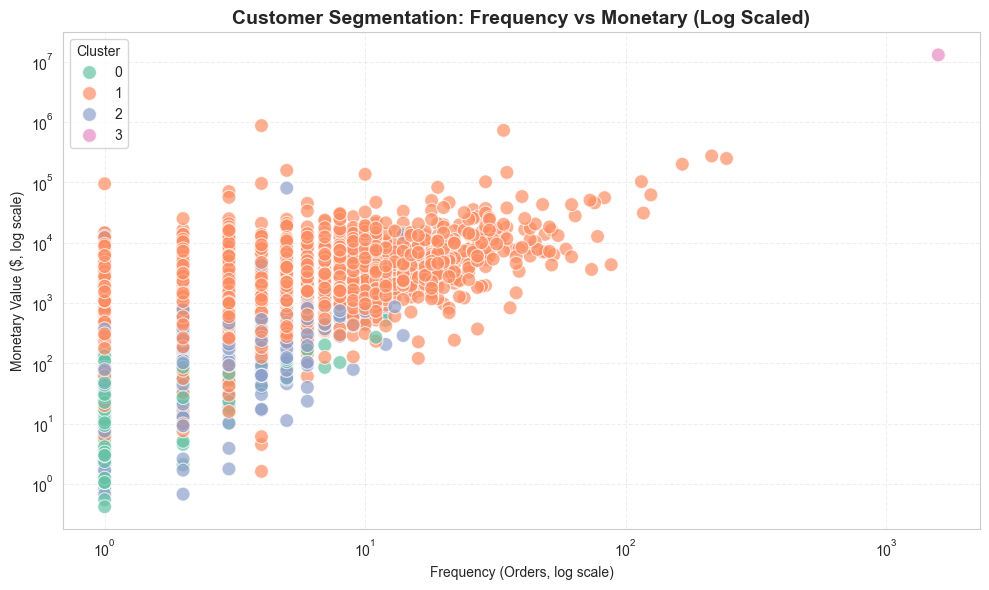

In [59]:
# Frequency vs. Monetary scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rfm_table, 
    x="Frequency", 
    y="Monetary", 
    hue="Cluster", 
    palette="Set2", 
    s=100, 
    alpha=0.7
)

plt.xscale('log')
plt.yscale('log')

plt.title("Customer Segmentation: Frequency vs Monetary (Log Scaled)", fontsize=14, fontweight="bold")
plt.xlabel("Frequency (Orders, log scale)")
plt.ylabel("Monetary Value ($, log scale)")
plt.legend(title="Cluster")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



#####  Cluster Visualization: Frequency vs Monetary (Log Scaled)

This scatter plot visualizes customer segments based on their **purchase frequency** and **total spend**, with both axes scaled logarithmically to manage the impact of outliers.

- Each point represents a customer, colored by their cluster.
- **Log scaling** allows us to see patterns more clearly by compressing wide numeric ranges.

##### Key Insights:
- **Cluster 3 (Purple)** represents a **super VIP customer** with extremely high frequency and monetary value.
- **Cluster 1 (Orange)** contains the majority of customers, spanning a wide range of spending and order counts — likely regular buyers.
- **Clusters 0 and 2 (Green and Blue)** are concentrated in the lower ranges of frequency and spending, indicating **low-engagement or first-time buyers**.

This visualization is valuable for identifying **high-value segments**, as well as those that may need **re-engagement or nurturing** to increase lifetime value.


In [29]:
# Filter valid transactions (no cancellations, no missing description)
basket_data = df[
    (df["Quantity"] > 0) &
    (~df["InvoiceNo"].astype(str).str.startswith("C")) &
    (df["Description"].notnull())
].copy()

# Group by Invoice and Description, sum the Quantity
basket = (
    basket_data
    .groupby(["InvoiceNo", "Description"])["Quantity"]
    .sum()
    .unstack()
    .fillna(0)
)

# Convert to binary (1 = purchased, 0 = not purchased)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Show the first few rows
basket.head()


C:\Users\wpmpo\AppData\Local\Temp\ipykernel_30836\2100821326.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Description,20713,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
537237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537240,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
537241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 🛒 Prepare Data for Market Basket Analysis

To apply the Apriori algorithm, we must convert the dataset into a **basket format** where:

- Each **row** represents a transaction (Invoice)
- Each **column** represents a product (Description)
- Each **cell** contains a `1` if the product was purchased in that transaction, otherwise `0`

We filtered out:
- Transactions with negative quantities
- Canceled invoices (starting with 'C')
- Missing product descriptions

This transformation allows us to discover frequently co-purchased items using association rule mining.


In [61]:
!pip install mlxtend



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 984.7 kB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.4 MB 984.7 kB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.4 MB 916.3 kB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 878.1 kB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 878.1 kB/s eta 0:00:01
   -------------------------------------- - 1.3/1.4 MB 790.5 kB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 770.0 kB/s eta 0:00:00


In [62]:
from mlxtend.frequent_patterns import apriori

# Apply the apriori algorithm
frequent_itemsets = apriori(
    basket, 
    min_support=0.02,  # Minimum support threshold (tune as needed)
    use_colnames=True
)

# Sort by support descending
frequent_itemsets = frequent_itemsets.sort_values(by="support", ascending=False)

# Show top results
frequent_itemsets.head(10)


c:\Users\wpmpo\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
277,0.112721,(WHITE HANGING HEART T-LIGHT HOLDER)
105,0.105398,(JUMBO BAG RED RETROSPOT)
200,0.099662,(REGENCY CAKESTAND 3 TIER)
160,0.085937,(PARTY BUNTING)
130,0.079023,(LUNCH BAG RED RETROSPOT)
15,0.072877,(ASSORTED COLOUR BIRD ORNAMENT)
221,0.070931,(SET OF 3 CAKE TINS PANTRY DESIGN )
152,0.066117,(PACK OF 72 RETROSPOT CAKE CASES)
123,0.064324,(LUNCH BAG BLACK SKULL.)
142,0.062839,(NATURAL SLATE HEART CHALKBOARD )


### 📊 Apply Apriori Algorithm to Discover Frequent Itemsets

We applied the **Apriori algorithm** to the basket-formatted dataset to identify **frequently co-purchased product combinations**.

- **Minimum support** was set to `0.02`, meaning we’re looking for itemsets present in at least 2% of all transactions.
- The algorithm returns itemsets (1 or more products) that meet this threshold.
- These frequent itemsets form the basis for generating actionable **association rules**.

The output below shows the top product combinations sorted by their support value.


In [63]:
from mlxtend.frequent_patterns import association_rules

# Generate the rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Sort rules by confidence
rules = rules.sort_values(by="confidence", ascending=False)

# Show top rules
rules[["antecedents", "consequents", "support", "confidence", "lift"]].head(10)


,antecedents,consequents,support,confidence,lift
33,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.027707,0.904682,17.735769
32,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.027707,0.856013,15.903428
10,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.032367,0.826144,16.196068
156,"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT)",(JUMBO BAG RED RETROSPOT),0.020844,0.802761,7.616481
168,"(GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKE...",(ROSES REGENCY TEACUP AND SAUCER ),0.020486,0.801603,14.892583
14,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.030626,0.781699,14.522799
169,"(ROSES REGENCY TEACUP AND SAUCER , REGENCY CAK...",(GREEN REGENCY TEACUP AND SAUCER),0.020486,0.775194,15.197223
2,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.038718,0.759036,14.101750
30,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.027963,0.720317,15.405150
3,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.038718,0.719315,14.101750


###  Analyze Association Rules

The table below shows the top product-to-product rules discovered using the Apriori algorithm with a **minimum lift of 1.0**.

Each rule includes:
- **Antecedents**: Product(s) in the “if” part
- **Consequents**: Product(s) in the “then” part
- **Support**: Proportion of transactions containing the rule
- **Confidence**: Probability of the consequent given the antecedent
- **Lift**: How much more likely the consequent is bought when the antecedent is bought (Lift > 1 indicates strong positive association)

#### 🔍 Key Observations:
- Customers who purchase **PINK or GREEN REGENCY TEACUP AND SAUCER** are **extremely likely to purchase matching color variations**, with confidence > 0.90 and **lift as high as 17.7**.
- Bundles like **JUMBO STORAGE BAGS** often lead to buying **JUMBO BAG RED RETROSPOT** (Lift ≈ 7.6).
- The lift values are significantly >1, suggesting that these associations are **not random** and represent real cross-selling opportunities.

#### 📌 Business Implications:
- These strong associations can be used to:
  - Recommend matching items at checkout (cross-sell)
  - Bundle frequently bought-together items for promotional pricing
  - Optimize shelf placement or display combinations


In [65]:
!pip install networkx

  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\wpmpo\AppData\Local\Temp\ipykernel_15812\1241072803.py:29: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\wpmpo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


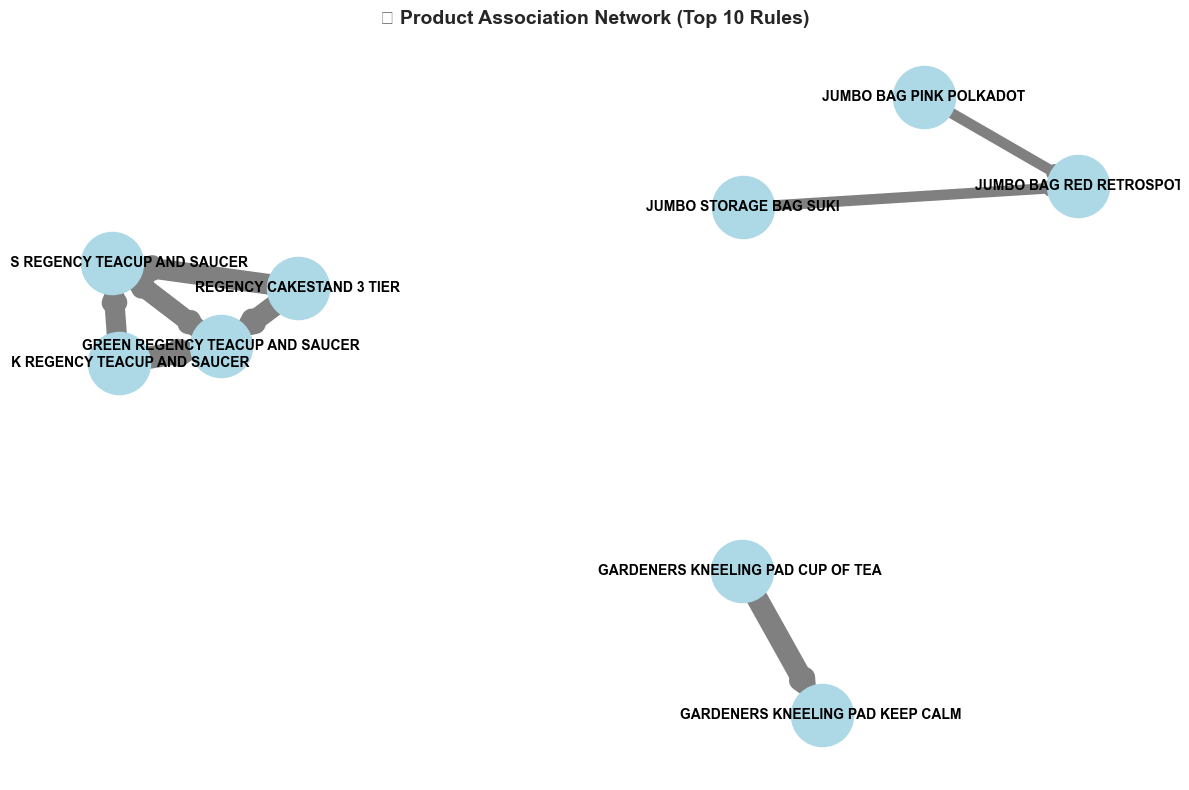

In [66]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph
G = nx.DiGraph()

# Use only the top 10 rules for simplicity
top_rules = rules.head(10)

# Add edges (antecedents → consequents) with lift as edge weight
for _, row in top_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

# Set figure size
plt.figure(figsize=(12, 8))

# Generate layout and draw
pos = nx.spring_layout(G, k=1.2)
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='gray', arrows=True)

plt.title("📦 Product Association Network (Top 10 Rules)", fontsize=14, fontweight="bold")
plt.axis('off')
plt.tight_layout()
plt.show()


### 📊 Association Rule Network Visualization

The graph above visualizes the **top 10 association rules** using a directed network:

- **Nodes** represent products.
- **Arrows** show the direction of the rule (antecedent → consequent).
- **Edge thickness** represents the strength of association (Lift).

This view makes it easy to:
- Spot highly connected “influencer” products (strong antecedents).
- Understand product flow and bundling opportunities.
- Identify natural product groupings for promotions or recommendations.


## 6. Predictive Modeling

### 6.1 Log Transformation of Monetary Value

The distribution of customer revenue (`Monetary`) was highly skewed due to a few VIP customers with extremely high purchase amounts.

To normalize the distribution, we applied a **log transformation** using `log1p()`, which is suitable for values that may include zeros.

- This reduces the impact of outliers
- Helps the regression model learn patterns more effectively
- Makes the distribution more symmetric and suitable for linear modeling

The plot below compares the **original** vs **log-transformed** revenue values.


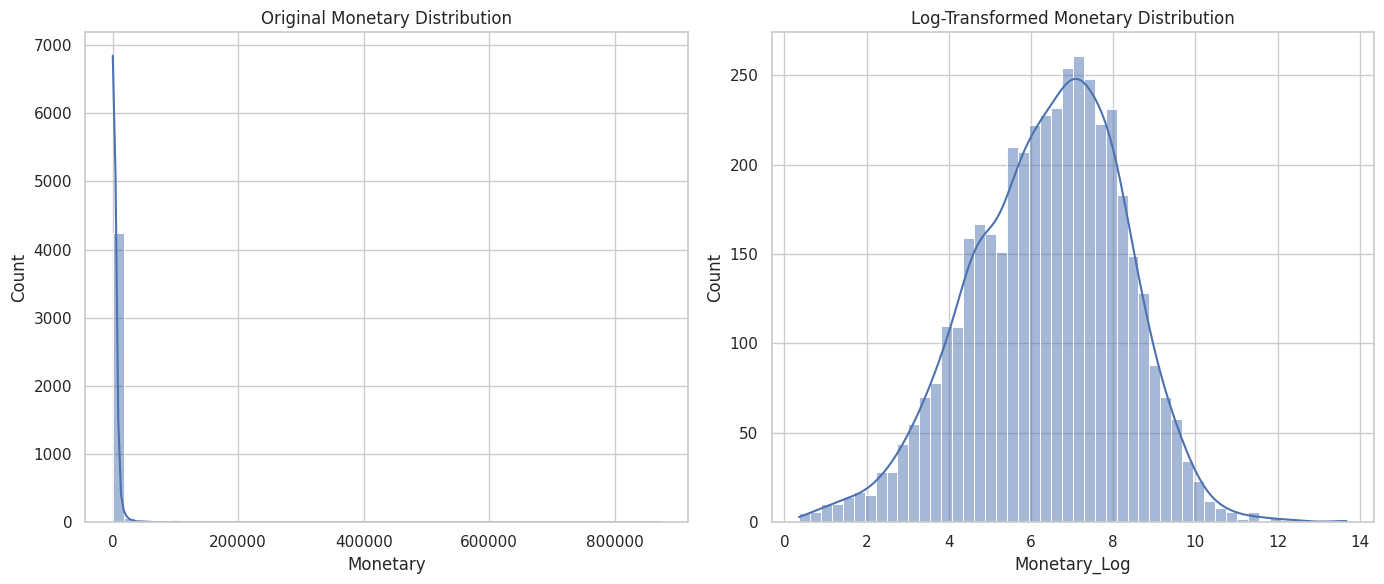

In [31]:
import numpy as np

# Apply log transformation to monetary values
rfm_table["Monetary_Log"] = np.log1p(rfm_table["Monetary"])

# Optional: Check skew or compare original vs transformed
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Original
plt.subplot(1, 2, 1)
sns.histplot(rfm_table["Monetary"], bins=50, kde=True)
plt.title("Original Monetary Distribution")

# Log-transformed
plt.subplot(1, 2, 2)
sns.histplot(rfm_table["Monetary_Log"], bins=50, kde=True)
plt.title("Log-Transformed Monetary Distribution")

plt.tight_layout()
plt.show()


In [32]:
import numpy as np
from sklearn.model_selection import train_test_split

# Add this BEFORE your train-test split
rfm_table["Monetary_Log"] = np.log1p(rfm_table["Monetary"])

# Define features and target
features = ["Recency", "Frequency"]
X = rfm_table[features]
y = rfm_table["Monetary_Log"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (3462, 2)
Test set: (866, 2)


### Feature Selection and Train-Test Split

To train a regression model that predicts **customer revenue**, we selected `Recency` and `Frequency` as the independent variables.

The target variable is the **log-transformed `Monetary` value**, which helps reduce skew caused by extreme outliers.

We split the dataset into:
- **Training set (80%)** for model learning
- **Test set (20%)** for unbiased evaluation

This split ensures we can measure how well the model generalizes to unseen data.


### 6.2 Linear Regression 

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Results:")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")


Model Evaluation Results:
R² Score: 0.619
RMSE: 1.177


##### Linear Regression Model – Evaluation Results

The regression model was trained to predict a customer's **log-transformed monetary value** based on their **recency and frequency** metrics.

##### Performance Metrics:

- **R² Score:** 0.619  
  → The model explains approximately **62% of the variance** in customer revenue.

- **RMSE:** 1.177 (on log scale)  
  → Indicates an average prediction error of approximately **e¹·¹⁷⁷ ≈ 3.25x** on the raw revenue scale.

##### Interpretation:

- This is a **strong baseline result** for just two features (`Recency` and `Frequency`).
- Recency and frequency are indeed **highly predictive** of customer value.
- The model could be further improved by adding:
  - More behavioral features like `AverageOrderValue`, `Tenure`, etc.
  - Categorical variables (e.g., country, segment)

This model can help **forecast customer value** and prioritize marketing efforts based on revenue potential.


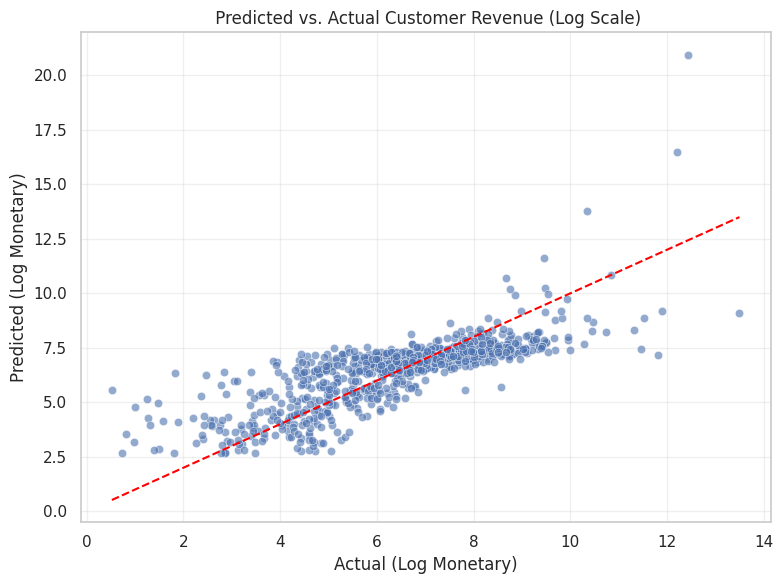

In [39]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual (Log Monetary)")
plt.ylabel("Predicted (Log Monetary)")
plt.title(" Predicted vs. Actual Customer Revenue (Log Scale)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [40]:
# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Evaluation:")
print(f"R² Score: {rf_r2:.3f}")
print(f"RMSE: {rf_rmse:.3f}")


Random Forest Evaluation:
R² Score: 0.650
RMSE: 1.128


#### Model Comparison Summary

We evaluated two regression models to predict log-transformed customer revenue (`Monetary_Log`):

| Model              | R² Score | RMSE   |
|-------------------|----------|--------|
| Linear Regression | 0.619    | 1.177  |
| Random Forest     | **0.650**| **1.128** |

##### Key Insights:

- The **Random Forest Regressor** outperformed the linear model in both accuracy and error.
- Its ability to capture **nonlinear relationships** likely contributed to improved performance.
- This model is a strong candidate for **predicting customer value** in future marketing or retention workflows.

We also saved the Random Forest model as a `.pkl` file to the `models/` folder for future deployment.


## 8. Insights & Business Recommendations

Based on the end-to-end analysis of customer behavior, spending patterns, and predictive modeling, here are the key business insights and strategic recommendations:



###  Key Insights:

1. **Customer Segmentation (RFM Analysis)**
   - Most customers fall into the **"Potential"** and **"At Risk"** segments.
   - **VIPs**, though smaller in number, contribute the **majority of revenue**.
   - Loyal customers offer consistent revenue and are worth nurturing.

2. **Customer Behavior**
   - **VIP customers** show significantly higher average order value (AOV) and order frequency.
   - **Regular customers** typically place fewer orders and spend less per order.
   - Clear behavioral gaps between VIP and Regular segments support targeted strategy.

3. **Revenue Breakdown**
   - The **top 10% of customers generate over 70–80%** of total revenue.
   - The "At Risk" group contributes minimal revenue, despite its size.

4. **Predictive Modeling**
   - A **Random Forest model** achieved an R² score of **0.65**, indicating strong predictive power.
   - The model can be used to **forecast customer revenue** and support **targeted marketing or prioritization**.

---

###  Business Recommendations:

 **1. Prioritize High-Value Segments**
   - Focus retention strategies on **VIPs** and **Loyal customers** through loyalty programs, exclusive deals, and early access offers.

 **2. Nurture Potential Customers**
   - Convert “Potential” customers into “Loyal” through tailored onboarding emails, product suggestions, and discounts after a second purchase.

 **3. Re-Engage At-Risk Customers**
   - Use reactivation campaigns, personalized discounts, and surveys to understand and reduce churn.

 **4. Predict and Promote Future VIPs**
   - Use the trained Random Forest model to **predict high-revenue customers early** and apply targeted marketing interventions.

 **5. Monitor Customer AOV and Frequency**
   - Use average order value and purchase frequency as early indicators for VIP potential and segmentation shifts.



This analysis equips the business with actionable insights to increase revenue, improve customer retention, and build data-driven customer strategies.


## 9. Conclusion

This project provided a comprehensive analysis of e-commerce customer behavior using transaction data. The main objectives were to understand customer value, identify behavioral patterns, segment customers effectively, and predict future revenue.

We achieved this through the following key steps:

- Conducted thorough **data cleaning and preprocessing**
- Performed detailed **exploratory data analysis (EDA)** to uncover trends in sales and customer activity
- Applied **RFM analysis** to segment customers based on recency, frequency, and monetary value
- Created advanced features like **Average Order Value** and **Customer Type** for deeper behavior profiling
- Built and evaluated predictive models, where **Random Forest** performed best with an R² of **0.65**
- Extracted actionable **business insights and recommendations** for targeted marketing and retention strategies

This analysis demonstrates the power of customer segmentation and predictive modeling in driving business decisions. With the right data strategy in place, businesses can maximize revenue, reduce churn, and build stronger customer relationships.

